In [1]:
import numpy as np 
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [ ]:
v vff

In [2]:
df = pd.read_csv('flights_final.csv', sep="\t", quoting=csv.QUOTE_ALL, engine='python')


In [3]:
df['Engine_Start_Above_1000ft'].value_counts()

Engine_Start_Above_1000ft
True     53
False    44
Name: count, dtype: int64

In [4]:
df=df[df['min_speed_while_engine_running (knots)'].notnull()]

In [5]:
df = df.head(20)

In [6]:
df[['File','Gtype', 'avg_speed_while_engine_running (knots)', 'min_speed_while_engine_running (knots)', 'max_speed_while_engine_running (knots)']]

,File,Gtype,avg_speed_while_engine_running (knots),min_speed_while_engine_running (knots),max_speed_while_engine_running (knots)
0,2023-06-04-LXV-NBR-01.IGC,VENTUS 3F,72.30,50.55,100.98
1,2024-04-26-LXV-NBR-01.IGC,VENTUS 3F,61.25,51.91,66.48
2,2019-03-08-LXV-80S-01.IGC,Ventus2/15m,55.86,45.72,74.58
3,2015-06-06-CNI-V8R-01.IGC,DG-400,"45.74,52.29","30.24,43.20","50.76,68.03"
4,2021-06-15-LXV-780-01.IGC,ASH 31 MI,"53.71,60.24","31.59,48.65","66.88,70.02"
5,2024-04-27-LXV-80S-01.IGC,Ventus2/18m,41.23,34.73,55.75
6,2015-06-07-CNI-V8R-01.IGC,DG-400,45.69,28.62,57.78
7,2019-04-21-LXV-7R1-01.IGC,ASW 27-18 E (ASG-29E),47.74,43.77,52.49
8,2021-10-03-LXV-9BF-01.IGC,Default,74.09,69.18,79.08
9,2021-07-18-LXV-780-02.IGC,ASH 31 MI,"65.55,68.69","31.95,47.51","97.76,84.81"


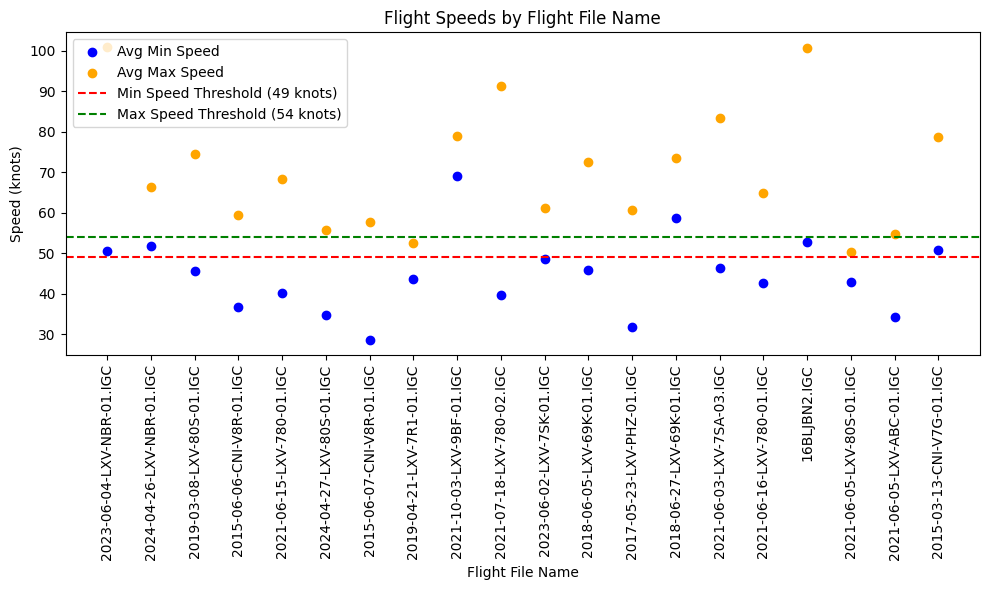

In [7]:
# Function to convert comma-separated string of speeds to a list of floats
def parse_speed_values(speed_str):
    if pd.isnull(speed_str) or speed_str.strip() == '':
        return []
    return [float(item.strip()) for item in speed_str.split(',')]

# Parse the speed columns into lists of floats
df['min_speed_list'] = df['min_speed_while_engine_running (knots)'].apply(parse_speed_values)
df['max_speed_list'] = df['max_speed_while_engine_running (knots)'].apply(parse_speed_values)

# Aggregate the multiple speed values into a single value per flight.
# Here we compute the average for demonstration purposes.
df['avg_min_speed'] = df['min_speed_list'].apply(lambda speeds: sum(speeds)/len(speeds) if speeds else None)
df['avg_max_speed'] = df['max_speed_list'].apply(lambda speeds: sum(speeds)/len(speeds) if speeds else None)

# Create a scatter plot with the flight file name on the x axis and the speeds on the y axis.
plt.figure(figsize=(10, 6))

# Plot the aggregated average min speeds for each flight
plt.scatter(df['File'], df['avg_min_speed'], color='blue', label='Avg Min Speed')

# Plot the aggregated average max speeds for each flight
plt.scatter(df['File'], df['avg_max_speed'], color='orange', label='Avg Max Speed')

# Add horizontal threshold lines for the speeds:
#  - 49 knots for the min speed threshold
#  - 54 knots for the max speed threshold
plt.axhline(y=49, color='red', linestyle='--', label='Min Speed Threshold (49 knots)')
plt.axhline(y=54, color='green', linestyle='--', label='Max Speed Threshold (54 knots)')

# Customize the plot with labels and title
plt.xlabel('Flight File Name')
plt.ylabel('Speed (knots)')
plt.title('Flight Speeds by Flight File Name')
plt.legend()
plt.xticks(rotation=90)  # Rotate file names for better readability if needed
plt.tight_layout()

# Display the plot
plt.show()